In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)

In [2]:
unemployment_df = pd.read_csv('/content/Unemployment in India.csv')

In [3]:
unemployment_df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
unemployment_df.shape

(768, 7)

In [5]:
# View first 5 rows
unemployment_df.head(5)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [6]:
# View last 5 rows
unemployment_df.tail(5)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN
767,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
unemployment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [8]:
unemployment_df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


# Unemployment Analysis EDA

In [9]:
# Rename the columns
unemployment_df.rename(columns={'Region':'State',' Date':'Date',' Frequency':'Frequency',
                                ' Estimated Unemployment Rate (%)':'Estimated Unemployment Rate (%)',
                                ' Estimated Employed':'Estimated Employed',
                                ' Estimated Labour Participation Rate (%)':'Estimated Labour Participation Rate (%)'},inplace=True)

In [10]:
unemployment_df

,State,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Find duplicated rows
unemployment_df.duplicated().sum()

np.int64(27)

In [12]:
# Remove duplicated rows
unemployment_df = unemployment_df.drop_duplicates()

In [13]:
# Find duplicated rows
unemployment_df.duplicated().sum()

np.int64(0)

In [14]:
unemployment_df.count()

,0
State,740
Date,740
Frequency,740
Estimated Unemployment Rate (%),740
Estimated Employed,740
Estimated Labour Participation Rate (%),740
Area,740


In [16]:
# Check null values
unemployment_df.isna().sum()

,0
State,1
Date,1
Frequency,1
Estimated Unemployment Rate (%),1
Estimated Employed,1
Estimated Labour Participation Rate (%),1
Area,1


In [17]:
# Remove null values
unemployment_df = unemployment_df.dropna()

In [18]:
unemployment_df.isna().sum()

,0
State,0
Date,0
Frequency,0
Estimated Unemployment Rate (%),0
Estimated Employed,0
Estimated Labour Participation Rate (%),0
Area,0


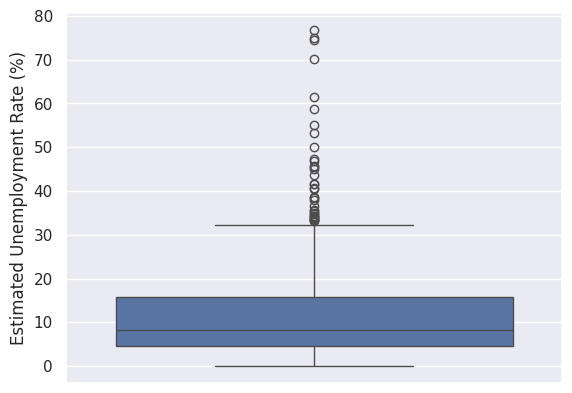

In [19]:
# Check outliers for 'Estimated Unemployment Rate (%)'
# boxplot
sns.boxplot(unemployment_df['Estimated Unemployment Rate (%)'])
plt.show();

In [20]:
Q1 = unemployment_df['Estimated Unemployment Rate (%)'].quantile(0.25)
Q2 = unemployment_df['Estimated Unemployment Rate (%)'].median()
Q3 = unemployment_df['Estimated Unemployment Rate (%)'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
unemployment_df = unemployment_df[(unemployment_df['Estimated Unemployment Rate (%)'] >= lower_bound) &
 (unemployment_df['Estimated Unemployment Rate (%)'] <= upper_bound)]

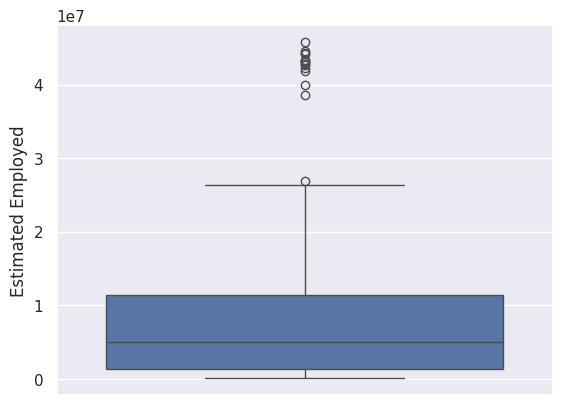

In [21]:
# Check outliers for 'Estimated Employed'
# boxplot
sns.boxplot(unemployment_df['Estimated Employed'])
plt.show();

In [22]:
Q1 = unemployment_df['Estimated Employed'].quantile(0.25)
Q2 = unemployment_df['Estimated Employed'].median()
Q3 = unemployment_df['Estimated Employed'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
unemployment_df = unemployment_df[(unemployment_df['Estimated Employed'] >= lower_bound) & (unemployment_df['Estimated Employed'] <= upper_bound)]

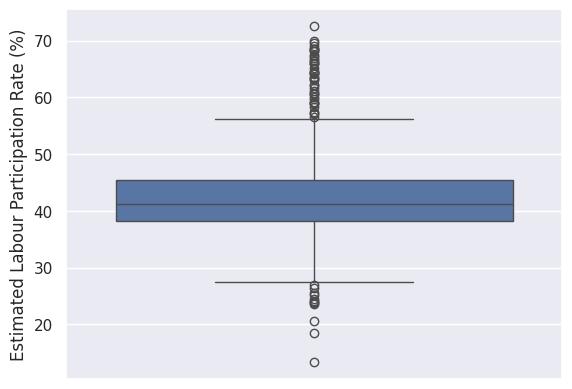

In [23]:
# Check outliers for 'Estimated Labour Participation Rate (%)'
# boxplot
sns.boxplot(unemployment_df['Estimated Labour Participation Rate (%)'])
plt.show();

In [24]:
Q1 = unemployment_df['Estimated Labour Participation Rate (%)'].quantile(0.25)
Q2 = unemployment_df['Estimated Labour Participation Rate (%)'].median()
Q3 = unemployment_df['Estimated Labour Participation Rate (%)'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
unemployment_df = unemployment_df[(unemployment_df['Estimated Labour Participation Rate (%)'] >= lower_bound) &
 (unemployment_df['Estimated Labour Participation Rate (%)'] <= upper_bound)]

In [25]:
unemployment_df

,State,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
749,West Bengal,29-02-2020,Monthly,7.55,10871168.0,44.09,Urban
750,West Bengal,31-03-2020,Monthly,6.67,10806105.0,43.34,Urban
751,West Bengal,30-04-2020,Monthly,15.63,9299466.0,41.20,Urban
752,West Bengal,31-05-2020,Monthly,15.22,9240903.0,40.67,Urban


In [26]:
# Split 'Date' column into three columns - year, month, and day
unemployment_df[['Day','Month','Year']] = unemployment_df['Date'].str.split('-',expand=True)

In [27]:
# Remove 'Date' column
unemployment_df.drop('Date',axis=1,inplace=True)

In [28]:
unemployment_df

,State,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Day,Month,Year
0,Andhra Pradesh,Monthly,3.65,11999139.0,43.24,Rural,31,05,2019
1,Andhra Pradesh,Monthly,3.05,11755881.0,42.05,Rural,30,06,2019
2,Andhra Pradesh,Monthly,3.75,12086707.0,43.50,Rural,31,07,2019
3,Andhra Pradesh,Monthly,3.32,12285693.0,43.97,Rural,31,08,2019
4,Andhra Pradesh,Monthly,5.17,12256762.0,44.68,Rural,30,09,2019
...,...,...,...,...,...,...,...,...,...
749,West Bengal,Monthly,7.55,10871168.0,44.09,Urban,29,02,2020
750,West Bengal,Monthly,6.67,10806105.0,43.34,Urban,31,03,2020
751,West Bengal,Monthly,15.63,9299466.0,41.20,Urban,30,04,2020
752,West Bengal,Monthly,15.22,9240903.0,40.67,Urban,31,05,2020


In [29]:
# Change data types
unemployment_df['Day'] = pd.to_numeric(unemployment_df['Day'])
unemployment_df['Month'] = pd.to_numeric(unemployment_df['Month'])
unemployment_df['Year'] = pd.to_numeric(unemployment_df['Year'])

In [30]:
# Check null values
unemployment_df.isna().sum()

,0
State,0
Frequency,0
Estimated Unemployment Rate (%),0
Estimated Employed,0
Estimated Labour Participation Rate (%),0
Area,0
Day,0
Month,0
Year,0


# Visualization

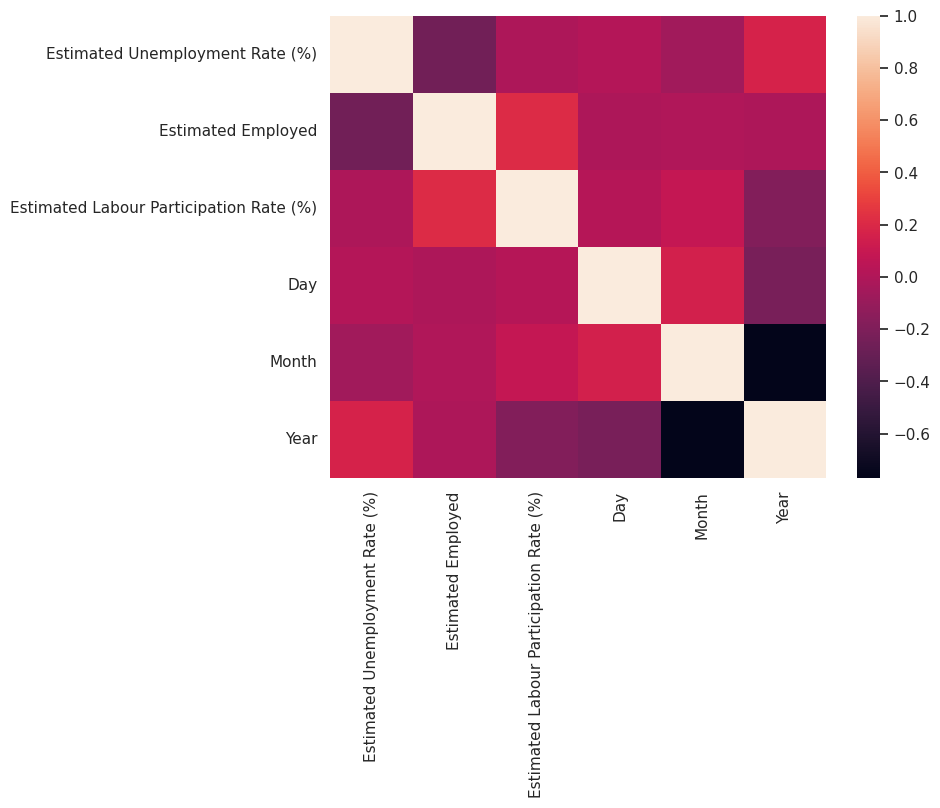

In [31]:
# Create a correlation plot between features
unemployment_corr = unemployment_df[['Estimated Unemployment Rate (%)','Estimated Employed','Estimated Labour Participation Rate (%)',
                                     'Day','Month','Year']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(unemployment_corr)
plt.show();

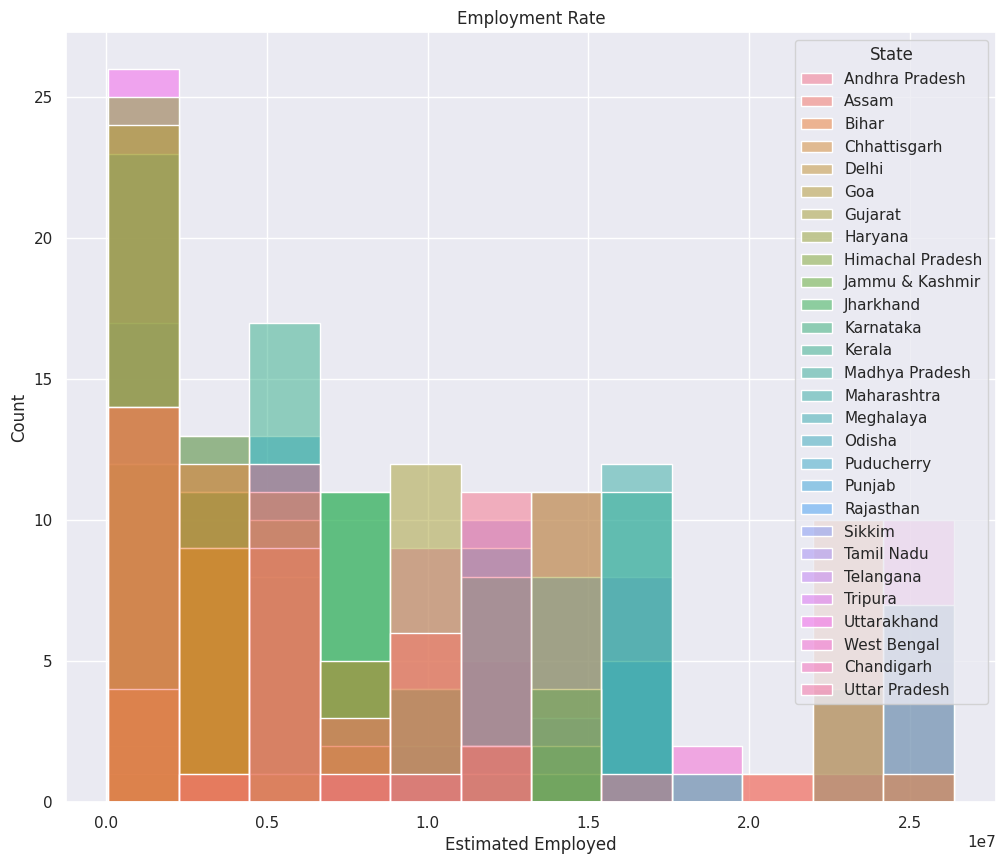

In [42]:
# Visualization of Employment Rate based on State
plt.figure(figsize=(12,10))
sns.histplot(data=unemployment_df,x='Estimated Employed',hue='State')
plt.title('Employment Rate')
plt.xlabel('Estimated Employed')
plt.ylabel('Count')
plt.show();

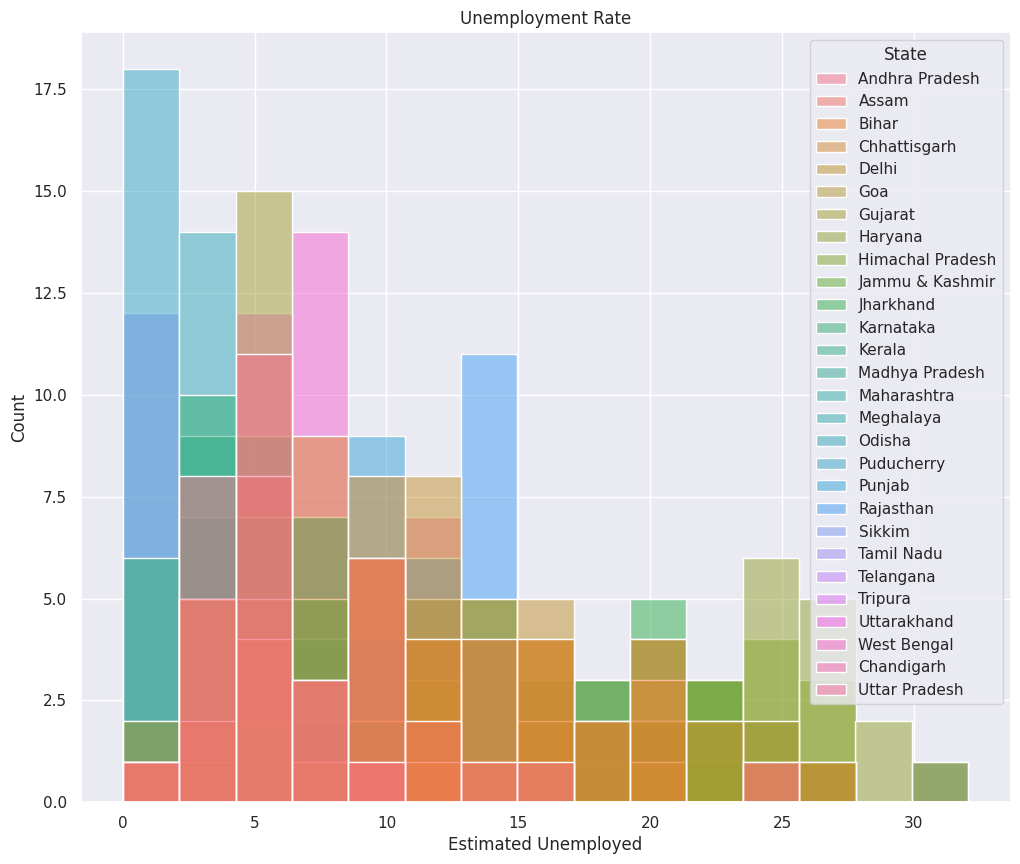

In [43]:
# Visualization of Unemployment Rate based on State
plt.figure(figsize=(12,10))
sns.histplot(data=unemployment_df,x='Estimated Unemployment Rate (%)',hue='State')
plt.title('Unemployment Rate')
plt.xlabel('Estimated Unemployed')
plt.ylabel('Count')
plt.show();

<ipython-input-66-cca9efd6c1ef>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=unemployment_df,x='Area',palette='bright')


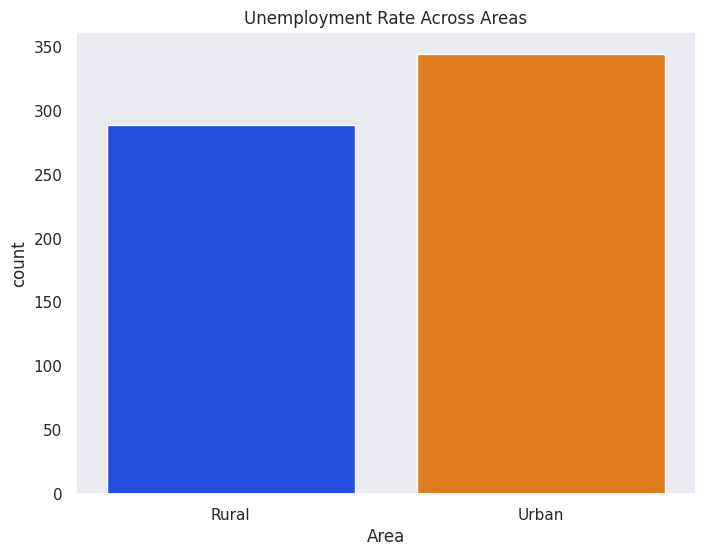

In [66]:
# Displays the counts of observations per each area
plt.figure(figsize=(8,6))
sns.countplot(data=unemployment_df,x='Area',palette='bright')
plt.title('Unemployment Rate Across Areas')
plt.grid(False)
plt.show();

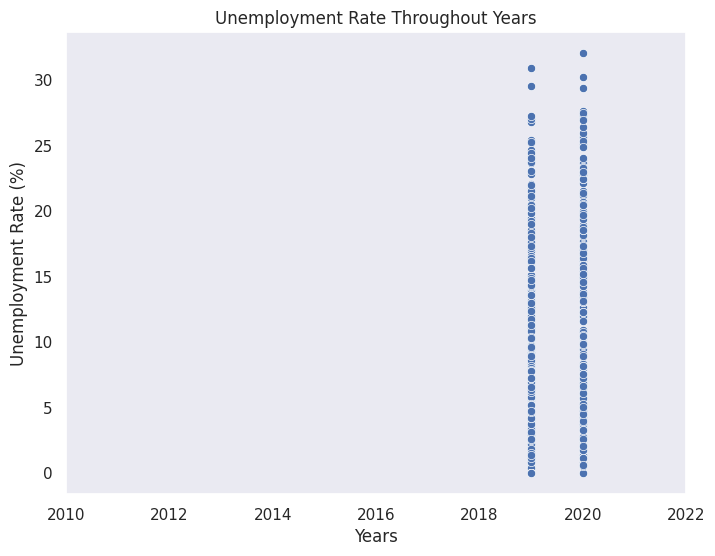

In [68]:
# Displays the relationship between unemployment rate and years
plt.figure(figsize=(8,6))
sns.scatterplot(data=unemployment_df,x='Year',y='Estimated Unemployment Rate (%)')
plt.title('Unemployment Rate Throughout Years')
plt.xlim(2010,2022)
plt.xlabel('Years')
plt.ylabel('Unemployment Rate (%)')
plt.grid()
plt.show();

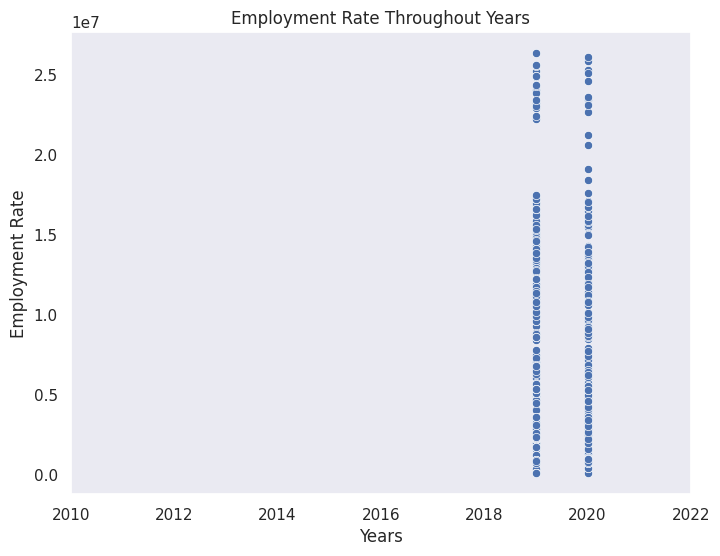

In [73]:
# Displays the relationship between employment rate and years
plt.figure(figsize=(8,6))
sns.scatterplot(data=unemployment_df,x='Year',y='Estimated Employed')
plt.title('Employment Rate Throughout Years')
plt.xlim(2010,2022)
plt.xlabel('Years')
plt.ylabel('Employment Rate')
plt.grid()
plt.show();

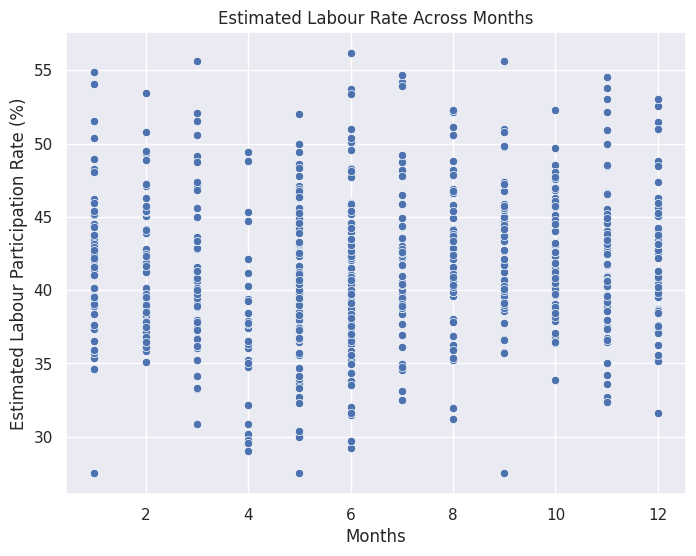

In [74]:
# Displays the relationship between employment estimated labour rate and months
plt.figure(figsize=(8,6))
sns.scatterplot(data=unemployment_df,x='Month',y='Estimated Labour Participation Rate (%)')
plt.title('Estimated Labour Rate Across Months')
plt.xlabel('Months')
plt.ylabel('Estimated Labour Participation Rate (%)')
plt.show();